In [ ]:
import h5py
import torch
import matplotlib.pyplot as plt
from Steerable.utils import Augment, rotate_image, HDF5, HDF5Dataset

function = lambda data, degree : (rotate_image(data[0], degree, order=1),data[1])
n_angle = 16
parameters = 360 * torch.arange(n_angle) / n_angle

datafile = h5py.File('../Data/RMNIST/data/RotMNIST.hdf5', 'r')
valdataset, _ = torch.utils.data.random_split(HDF5(datafile, mode='val'), [100, 1900])
aug_dataset = Augment(valdataset, function=function, parameters=parameters, batched=True)

hdf5dataset = HDF5Dataset('../Data/RMNIST/data/AugRotMNIST.hdf5', overwrite=True)
hdf5dataset.create_hdf5_dataset('val', aug_dataset, batched=True)

In [6]:
datafile = h5py.File('../Data/RMNIST/data/AugRotMNIST.hdf5', 'r')
aug_dataset = HDF5(datafile, mode='val')
print(len(aug_dataset))

1600


1


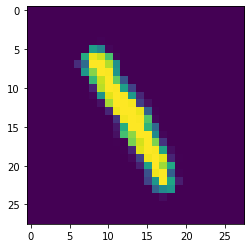

In [12]:
image, label = aug_dataset[16]
print(label.item())
plt.imshow(image[0])
plt.show()